Group Members: Samarth, Shruthi, Teena

**1. Introduction**

**1.1 Problem Statement:**
Traffic violations are a significant concern for public safety and law enforcement agencies. Understanding the patterns, trends, and contributing factors to these violations is crucial for devising effective strategies to promote road safety and reduce accidents. As a consumer of this analysis, you should be interested in this problem because it directly affects your safety as a road user and the safety of others, as well as regulatory compliance and law enforcement efforts.

**1.2 Approach:**
To address this problem, we will utilize a comprehensive dataset containing traffic violation information. The dataset includes various attributes such as the date and time of violations, location, involved parties, and specifics of the violations. Our methodology will involve employing data analysis techniques across multiple domains, including descriptive statistics, data visualization, correlation analysis, and potentially machine learning algorithms for prediction.

**1.3 Proposed Approach:**
We plan to start by conducting exploratory data analysis (EDA) to gain insights into the distribution and characteristics of traffic violations. This will involve visualizing the data to identify patterns and trends, such as the most common types of violations, variations by time of day and location, and demographic disparities. We will then perform correlation analysis to identify relationships between specific types of violations and factors such as personal injury or property damage. Additionally, we will explore seasonal variations in violation frequency using time series analysis techniques.

**1.4 Analysis Impact:**
The analysis conducted on this dataset will provide valuable insights into the patterns, trends, and contributing factors to traffic violations. Law enforcement agencies can use these insights to prioritize resources, target enforcement efforts effectively, and develop evidence-based policies and interventions aimed at improving road safety. Additionally, policymakers and transportation authorities can benefit from the analysis to implement measures that reduce violations and enhance traffic management strategies. Ultimately, the analysis will contribute to promoting safer roads and better compliance with traffic regulations, benefiting all road users and the wider community.

**2. Data Description and Cleaning**

**2.1 Original Source**:
The dataset was obtained from the Montgomery County Government, specifically from the Department of Police.[link text](https://catalog.data.gov/dataset/traffic-violations)

**2.2 Source Data Explanation:**The original purpose of the data is to provide information on traffic violations issued in Montgomery County. It contains details such as the date and time of violations, location, involved parties, violation types, and demographic characteristics of drivers. The data is continuously collected as new violations occur, and the dataset is regularly updated. It has multiple variables, including those related to accident involvement, personal injury, property damage, and search outcomes. Missing values are recorded as NaN, and no significant data imputation is performed, as missing values are left as is for analysis.

**2.3 Data Importing and Cleaning:**
Data importing involves reading the dataset into a pandas DataFrame. Cleaning steps include handling missing values, converting data types if necessary, and removing any unnecessary columns. We perform data cleaning to ensure data quality and consistency, which is essential for accurate analysis.

In [1]:
# Load Required Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data file
df = pd.read_csv("/content/Traffic_Violations.csv")

# Display first few rows of the dataframe to inspect the data
print("Initial Data:")
print(df.head())

Initial Data:
                                  SeqID Date Of Stop Time Of Stop Agency  \
0  345bbc5d-d407-45b4-a51f-2b4adacf9622    11/8/2023      8:44:00    MCP   
1  9ad17d0d-6783-445a-88ef-fb452e4385c6    11/8/2023     21:30:00    MCP   
2  9ad17d0d-6783-445a-88ef-fb452e4385c6    11/8/2023     21:30:00    MCP   
3  9ad17d0d-6783-445a-88ef-fb452e4385c6    11/8/2023     21:30:00    MCP   
4  4afdfba3-2023-4bd5-b4d5-3d5875c9e97e    11/7/2023      9:52:00    MCP   

                     SubAgency  \
0  3rd District, Silver Spring   
1       2nd District, Bethesda   
2       2nd District, Bethesda   
3       2nd District, Bethesda   
4        4th District, Wheaton   

                                         Description  \
0  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
1  DRIVING  MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...   
2  DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...   
3                KNOWINGLY DRIVING UNINSURED VEHICLE   
4  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 88 

In [3]:
# Check for duplicate values and remove them

print("Duplicate rows: ", df.duplicated().sum())

df.drop_duplicates(inplace=True)

Duplicate rows:  1708


In [4]:
# Check for null values and show just the columns having null values

print(df.isnull().sum()[df.isnull().sum() > 0])

Description                    8
Location                       1
Search Conducted          456454
Search Disposition        977762
Search Outcome            475505
Search Reason             977762
Search Reason For Stop    456688
Search Type               977768
Search Arrest Reason      994886
State                         50
Year                        5816
Make                          27
Model                         89
Color                      14865
Article                     2556
Driver City                  164
Driver State                   8
DL State                     822
dtype: int64


In [5]:
# List all the columns

df.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [6]:
# Drop some columns which are not needed for analyses (including those which have high number of null values)

columns_to_drop = ['SeqID', 'Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason',
                   'Search Reason For Stop', 'Search Type', 'Search Arrest Reason', 'DL State', 'Geolocation',]
df.drop(columns=columns_to_drop, inplace=True)

# Display final cleaned dataframe
print("\nCleaned Data:")
print(df.head())



Cleaned Data:
  Date Of Stop Time Of Stop Agency                    SubAgency  \
0    11/8/2023      8:44:00    MCP  3rd District, Silver Spring   
1    11/8/2023     21:30:00    MCP       2nd District, Bethesda   
2    11/8/2023     21:30:00    MCP       2nd District, Bethesda   
3    11/8/2023     21:30:00    MCP       2nd District, Bethesda   
4    11/7/2023      9:52:00    MCP        4th District, Wheaton   

                                         Description  \
0  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
1  DRIVING  MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...   
2  DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...   
3                KNOWINGLY DRIVING UNINSURED VEHICLE   
4  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 88 MPH I...   

                         Location   Latitude  Longitude Accident Belts  ...  \
0  BOARDBRICH DR @ BOURNFIELD WAY  39.055453 -76.960461       No    No  ...   
1   GEORGIA AVE / CONNECTICUT AVE  39.083935 -77.077504       No    No  ...   
2   GEOR

In [7]:
print('Final list of columns: ', df.columns)

Final list of columns:  Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'Arrest Type'],
      dtype='object')


In [8]:
# Fill null values in the remaining columns with 'Not Recorded'

df.fillna(value="Not Recorded", inplace=True)

/var/folders/pg/g6tg_cg936vg7skkz0z1140w0000gn/T/ipykernel_41636/3956144877.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Recorded' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(value="Not Recorded", inplace=True)


In [9]:
# Check shape of the data frame

df.shape

(1046867, 33)

**2.4 Final Data Set:**
The final dataset consists of cleaned data with rows containing valid information and columns relevant to the analysis. It is displayed in a condensed form to provide an overview without overwhelming the reader with excessive detail. code

In [10]:
# Display summary information about the cleaned dataset
print("Summary Information about the Cleaned Dataset:")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Display a preview of the cleaned dataset
print("\nPreview of the Cleaned Dataset:")
print(df.head())


Summary Information about the Cleaned Dataset:
Number of Rows: 1046867
Number of Columns: 33

Preview of the Cleaned Dataset:
  Date Of Stop Time Of Stop Agency                    SubAgency  \
0    11/8/2023      8:44:00    MCP  3rd District, Silver Spring   
1    11/8/2023     21:30:00    MCP       2nd District, Bethesda   
2    11/8/2023     21:30:00    MCP       2nd District, Bethesda   
3    11/8/2023     21:30:00    MCP       2nd District, Bethesda   
4    11/7/2023      9:52:00    MCP        4th District, Wheaton   

                                         Description  \
0  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
1  DRIVING  MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...   
2  DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...   
3                KNOWINGLY DRIVING UNINSURED VEHICLE   
4  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 88 MPH I...   

                         Location   Latitude  Longitude Accident Belts  ...  \
0  BOARDBRICH DR @ BOURNFIELD WAY  39.055453 -76.960461

**2.5) Summary of the variables of concern in your cleaned dataset:**

In [11]:
# Define the variables of concern
variables_of_concern = ['Date Of Stop' ,'Time Of Stop', 'Agency', 'Violation Type', 'Accident', 'Belts',
                        'Personal Injury', 'Property Damage', 'Alcohol', 'Work Zone', 'Race', 'Gender']

# Print the header of the summary table
print("{:<25} {:<10} {:<15} {:<30}".format("Variable", "Data Type", "Unique Values", "Top 5 Values (Frequency)"))
print("-" * 85)

# Loop through each variable
for variable in variables_of_concern:
    # Calculate summary information
    data_type = df[variable].dtype
    unique_values = df[variable].nunique()
    top_values = df[variable].value_counts().head().reset_index().values.tolist()

    # Print the summary information for each variable
    print("{:<25} {:<10} {:<15}".format(variable, str(data_type), str(unique_values)), end=" ")
    print("{:<30}".format(', '.join([f"{value} ({count})" for value, count in top_values])))


Variable                  Data Type  Unique Values   Top 5 Values (Frequency)      
-------------------------------------------------------------------------------------
Date Of Stop              object     4482            5/20/2014 (767), 5/30/2014 (737), 5/6/2014 (736), 5/21/2014 (734), 5/28/2014 (731)
Time Of Stop              object     1440            23:30:00 (1405), 23:00:00 (1289), 8:40:00 (1265), 8:35:00 (1263), 8:25:00 (1187)
Agency                    object     1               MCP (1046867)                 
Violation Type            object     4               Citation (840202), Warning (204109), ESERO (2544), SERO (12)
Accident                  object     2               No (997317), Yes (49550)      
Belts                     object     2               No (1005285), Yes (41582)     
Personal Injury           object     2               No (1024567), Yes (22300)     
Property Damage           object     2               No (1008293), Yes (38574)     
Alcohol                   

 **3) Exploratory
Data
Analysis**

**i) Are there any differences in the types of violation issued to drivers of different race or gender?**

In [12]:
# Create a cross-tabulation of Race and Violation Type
race_violation_type = pd.crosstab(df['Race'], df['Violation Type'])
print(race_violation_type)
print('\n')
# Create a cross-tabulation of Gender and Violation Type
gender_violation_type = pd.crosstab(df['Gender'], df['Violation Type'])
print(gender_violation_type)
print('\n')
# Create a cross-tabulation of Race and Arrest Type
race_arrest_type = pd.crosstab(df['Race'], df['Arrest Type'])
print(race_arrest_type)
print('\n')
# Create a cross-tabulation of Gender and Arrest Type
gender_arrest_type = pd.crosstab(df['Gender'], df['Arrest Type'])
print(gender_arrest_type)

Violation Type   Citation  ESERO  SERO  Warning
Race                                           
ASIAN               39166    116     0    13214
BLACK              273785    680     6    52149
HISPANIC           216808    749     4    34906
NATIVE AMERICAN      1384      5     0      367
OTHER               43387    324     1    16365
WHITE              265672    670     1    87108


Violation Type  Citation  ESERO  SERO  Warning
Gender                                        
F                 239292    793     3    80679
M                 600505   1751     9   122617
U                    405      0     0      813


Arrest Type      A - Marked Patrol  B - Unmarked Patrol  C - Marked VASCAR  \
Race                                                                         
ASIAN                        37393                 2473                 32   
BLACK                       256297                15775                 98   
HISPANIC                    203405                13540          

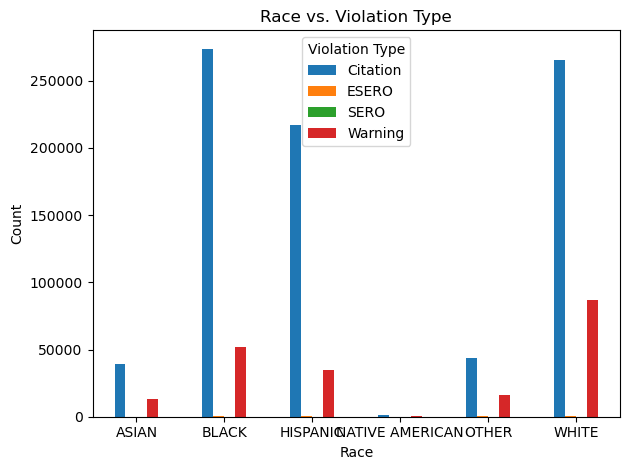

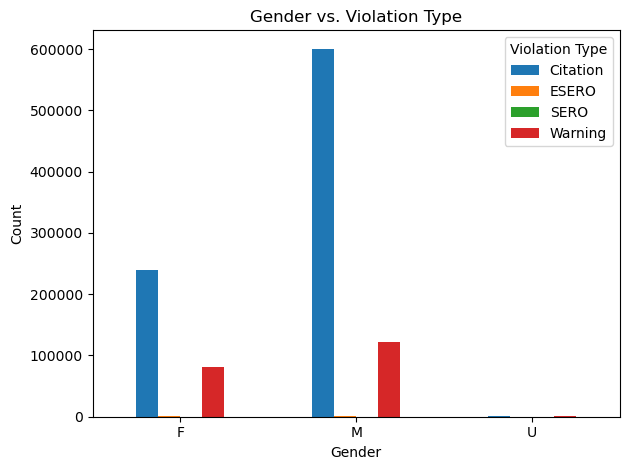

In [13]:
# Assuming your cross-tabulations are stored in variables as shown:
race_violation_type = pd.crosstab(df['Race'], df['Violation Type'])
gender_violation_type = pd.crosstab(df['Gender'], df['Violation Type'])
race_arrest_type = pd.crosstab(df['Race'], df['Arrest Type'])
gender_arrest_type = pd.crosstab(df['Gender'], df['Arrest Type'])

# Function to create bar charts with customizations
def create_bar_chart(data, title, x_label, y_label):
  data.plot(kind='bar')  # Create the bar chart
  plt.title(title)  # Set chart title
  plt.xlabel(x_label)  # Set x-axis label
  plt.ylabel(y_label)  # Set y-axis label
  plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent overlapping elements
  plt.show()  # Display the chart

# Create charts for Race vs. Violation Type
create_bar_chart(race_violation_type, "Race vs. Violation Type", "Race", "Count")

# Create charts for Gender vs. Violation Type
create_bar_chart(gender_violation_type, "Gender vs. Violation Type", "Gender", "Count")




Violation Type:

This table shows the breakdown of citations, ESERO , SERO, and warnings issued for each race category.
Asian drivers received the most warnings (39166), followed by White drivers (265672).
Black drivers received the most citations (273785).
Arrest Type:

These tables detail the number of arrests made for various reasons categorized by Race and Gender.
Males were arrested more frequently than females for most arrest types.
Key Points:

The data suggests potential racial disparities in traffic enforcement, with Black drivers receiving more citations and arrests compared to other races.
It's important to consider limitations:
The data doesn't account for factors like driving behavior or socioeconomic status, which could influence arrest rates.
Without knowing the total number of drivers from each race, it's difficult to determine if the observed differences are statistically significant.

**ii) Are there any significant correlations between specific types of traffic violations (e.g., alcohol-related violations, work zone violations) and the occurrence of personal injury or property damage?**

In [14]:
# Import contigency function from scipy.stast module from SciPi library
from scipy.stats import chi2_contingency

# Contingency table for Alcohol-related violations and Personal Injury
table_alcohol_injury = pd.crosstab(df['Alcohol'], df['Personal Injury'])

# Contingency table for Work Zone violations and Personal Injury
table_workzone_injury = pd.crosstab(df['Work Zone'], df['Personal Injury'])

# Contingency table for Alcohol-related violations and Property Damage
table_alcohol_damage = pd.crosstab(df['Alcohol'], df['Property Damage'])

# Contingency table for Work Zone violations and Property Damage
table_workzone_damage = pd.crosstab(df['Work Zone'], df['Property Damage'])

In [15]:
# Chi-square test for Alcohol and Personal Injury
chi2_stat, p_val, dof, ex = chi2_contingency(table_alcohol_injury)
print(f"Chi-square Test between Alcohol-related violations and Personal Injury:\nP-value: {p_val}")

# Chi-square test for Work Zone and Personal Injury
chi2_stat, p_val, dof, ex = chi2_contingency(table_workzone_injury)
print(f"Chi-square Test between Work Zone violations and Personal Injury:\nP-value: {p_val}")

# Chi-square test for Alcohol and Property Damage
chi2_stat, p_val, dof, ex = chi2_contingency(table_alcohol_damage)
print(f"Chi-square Test between Alcohol-related violations and Property Damage:\nP-value: {p_val}")

# Chi-square test for Work Zone and Property Damage
chi2_stat, p_val, dof, ex = chi2_contingency(table_workzone_damage)
print(f"Chi-square Test between Work Zone violations and Property Damage:\nP-value: {p_val}")

Chi-square Test between Alcohol-related violations and Personal Injury:
P-value: 3.9970501026012455e-19
Chi-square Test between Work Zone violations and Personal Injury:
P-value: 3.6668750541954655e-15
Chi-square Test between Alcohol-related violations and Property Damage:
P-value: 5.214036451792308e-78
Chi-square Test between Work Zone violations and Property Damage:
P-value: 2.99945774234912e-07


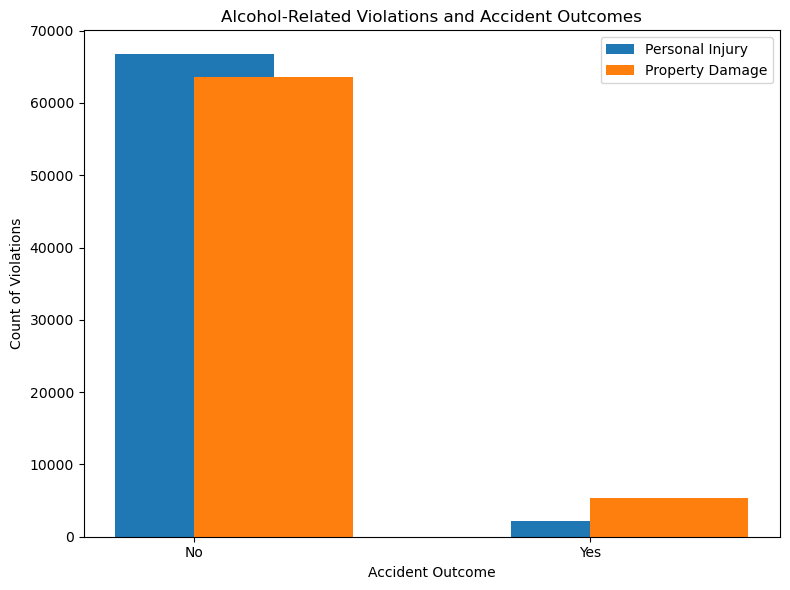

In [16]:
# 1. Convert description column to string data type
df['Description'] = df['Description'].astype(str)

# 2. Filter Data for Alcohol-Related Violations
alcohol_violations = df[df['Description'].str.contains("alcohol", case=False)]

# 3. Create a Stacked Bar Chart
injury_counts = alcohol_violations['Personal Injury'].value_counts()
damage_counts = alcohol_violations['Property Damage'].value_counts()

x = injury_counts.index  # Accident categories (Yes/No)
injury_values = injury_counts.values
damage_values = damage_counts.fillna(0).values  # Fill missing values with 0 for better visualization

plt.figure(figsize=(8, 6))
plt.bar(x, injury_values, label='Personal Injury', width=0.4, align='center')
plt.bar(x, damage_values, label='Property Damage', width=0.4, align='edge')
plt.xlabel('Accident Outcome')
plt.ylabel('Count of Violations')
plt.title('Alcohol-Related Violations and Accident Outcomes')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


The p-values provided from the Chi-square tests in your data give us crucial insights into the associations between different types of violations and accident outcomes:

1. *Alcohol-Related Violations and Personal Injury:*
   - This very small p-value indicates a significant statistical association between alcohol-related violations and personal injury. The likelihood of observing such data if there was no association is extremely low, confirming the influence of alcohol in accidents leading to personal injury.

2. *Work Zone Violations and Personal Injury:*
   - Similarly, this p-value is also very small and indicates a significant statistical association between work zone violations and personal injury. This suggests that incidents occurring in work zones are likely to lead to personal injuries.

3. *Alcohol-Related Violations and Property Damage:*
   - This extremely small p-value further supports a significant association between alcohol-related violations and property damage. It suggests that alcohol involvement in violations is a strong predictor of property damage.

4. *Work Zone Violations and Property Damage:*
   - This indicates a significant statistical association between work zone violations and property damage. It shows that violations in work zones are also likely to result in property damage, although the p-value is not as extremely low as for alcohol-related violations, suggesting a lower but still significant association.

Summary:
All tests show statistically significant results, implying that both alcohol-related and work zone violations are important factors contributing to personal injuries and property damage in traffic accidents. These results highlight the need for targeted interventions in these areas to reduce the rates of injuries and damages from such violations.

**iii) Violation Severity Analysis: What is the distribution of accident based on violation types?**

In [17]:
# Convert 'Time Of Stop' to datetime time object
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], format='%H:%M:%S')

# Extract hour from 'Time Of Stop'
df['Hour of Stop'] = pd.to_datetime(df['Time Of Stop'], format='%H:%M:%S')

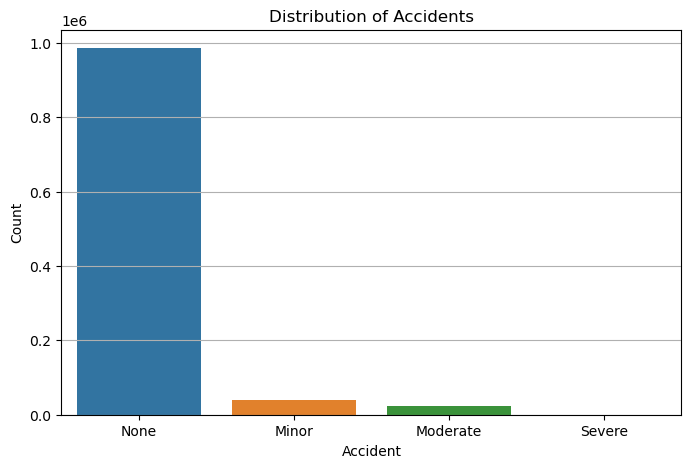

Violation Type  Citation  ESERO  SERO  Warning
Accident                                      
Minor              37503      3     0     1064
Moderate           21687      2     0      607
None              781008   2539    12   202438
Severe                 4      0     0        0


In [18]:
# Create 'Time_Of_Day' column
df['Time Of Day'] = pd.cut(df['Time Of Stop'].dt.hour,
                            bins=[0, 6, 12, 18, 24],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                            right=False)

# Define a function to categorize Accidents
def accident(row):
    if row['Personal Injury'] == 'Yes' and row['Property Damage'] == 'Yes':
        return 'Severe'
    elif row['Personal Injury'] == 'Yes':
        return 'Moderate'
    elif row['Property Damage'] == 'Yes':
        return 'Minor'
    else:
        return 'None'

# Apply the violation_severity function to create a new column 'Accident'
df['Accident'] = df.apply(accident, axis=1)

# Plot the distribution of Accident
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Accident', order=['None', 'Minor', 'Moderate', 'Severe'])
plt.title('Distribution of Accidents')
plt.xlabel('Accident')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Create a cross-tabulation of Accident and Violation Type
violation_severity_violation_type = pd.crosstab(df['Accident'], df['Violation Type'])
print(violation_severity_violation_type)


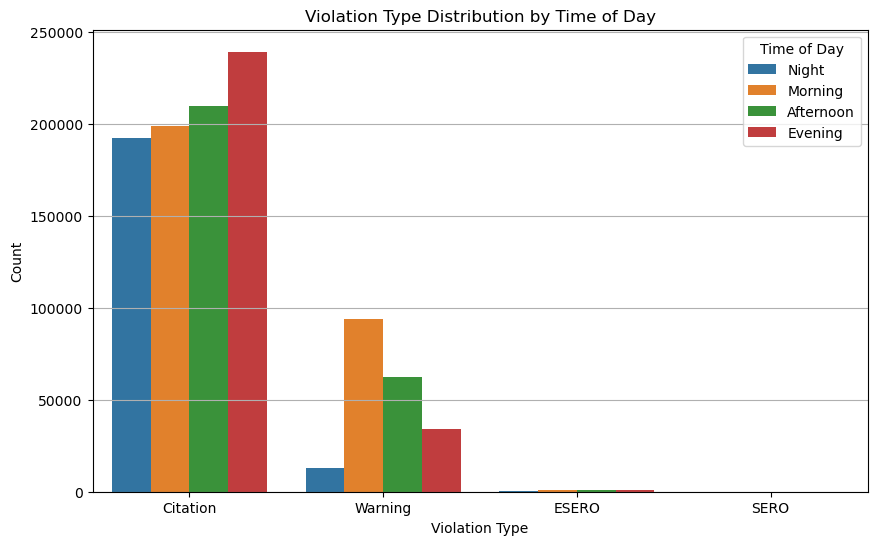

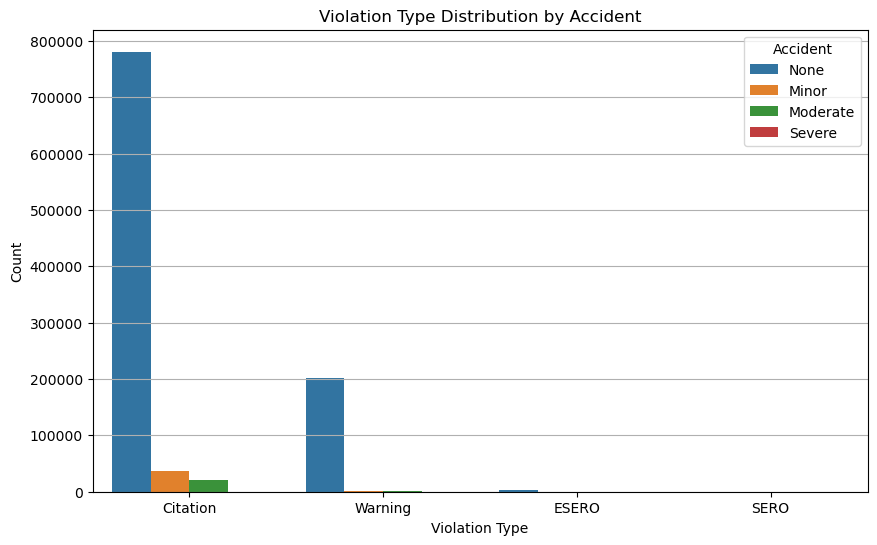

In [19]:
# Plot 2: Violation Type Distribution by Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Violation Type', hue='Time Of Day', order=df['Violation Type'].value_counts().index)
plt.title('Violation Type Distribution by Time of Day')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.legend(title='Time of Day')
plt.grid(axis='y')
plt.show()

# Plot 3: Violation Type Distribution by Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Violation Type', hue='Accident', order=df['Violation Type'].value_counts().index)
plt.title('Violation Type Distribution by Accident')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.legend(title='Accident')
plt.grid(axis='y')
plt.show()

**Explore Location-Based Variations
Top 10 locations with most violations**

Top 10 Locations with the Most Violations:
Location
RT 28 @ BLACKBERRY DR                      1679
IS 370 @ IS 270                            1590
W/B IS 370 @ IS 270                        1515
10901 WESTLAKE DRIVE                       1454
MONTGOMERY VILLAGE AVE @ RUSSELL AVE       1092
CLOPPER RD E/B @ ORCHARD HILLS DR          1059
WOODFIELD RD @ EMORY GROVE RD              1047
WB RT.198 @ SANTINI ROAD                    978
WAYNE AVE @ DALE DR                         901
SHADY GROVE METRO EXIT @ SHADY GROVE RD     895
Name: count, dtype: int64


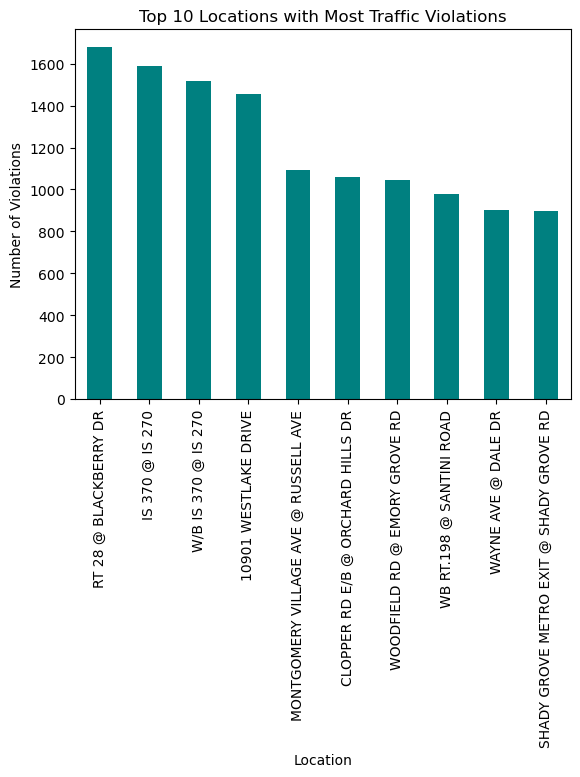

In [20]:
# Group by 'Location' and count the number of violations at each location
violation_counts = df['Location'].value_counts()

top_10_locations = violation_counts.head(10)

print("Top 10 Locations with the Most Violations:")
print(top_10_locations)

# Create a bar chart for the top 10 locations
top_10_locations.plot(kind='bar', color='teal')
plt.title('Top 10 Locations with Most Traffic Violations')
plt.xlabel('Location')
plt.ylabel('Number of Violations')
plt.show()

**4)Predictive Analysis**

4.1 Target (Y) Variable and Features (X) Variables
Target Variable (Y): Personal Injury - indicating whether the traffic violation involved personal injury (binary: 1/0).
Feature Variables (X): Binary variables related to the traffic violation circumstances: Alcohol, Belts, Commercial License, HAZMAT, Commercial Vehicle, Work Zone.


4.2 Predictive Models
Logistic Regression: Chosen for its simplicity, interpretability, and effectiveness with binary classification problems.

4.3 Evaluation Metrics
Accuracy: The proportion of correctly predicted outcomes. Suitable for balanced datasets like this one, where the classes are not heavily imbalanced.

4.4 Pre-processing Methods
Encoding: Convert binary categorical variables ('Yes'/'No') to numeric values (1/0).
Train-Test Split: Divide the dataset into training and testing sets for model validation.

4.5 Model Fine-Tuning and Accuracy Improvement
There's no explicit fine-tuning mentioned in the provided code. However, hyperparameter tuning (e.g., regularization strength) could be performed to optimize the model's performance.
Predictive accuracy may improve by adjusting model hyperparameters, exploring feature engineering, or using more sophisticated algorithms.

4.6 Final Model Choice and Accuracy
Final Model: Logistic Regression.
Accuracy Achieved: The accuracy score on the testing set is printed out.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a copy of the DataFrame for manipulation
df_model = df.copy()

# Simple encoding for categorical data: converting 'Yes'/'No' to 1/0
binary_columns = ['Alcohol', 'Belts', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Work Zone', 'Personal Injury']
for column in binary_columns:
    df_model[column] = df_model[column].map({'Yes': 1, 'No': 0})

# Select features that are directly related to the analysis and are already in binary format
features = df_model[['Alcohol', 'Belts', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Work Zone']]
target = df_model['Personal Injury']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting
predictions = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy}')

Accuracy: 0.978607659021655


In [22]:
# Check accuracy on the training set
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')

from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Training Accuracy: 0.9787210161756575
Confusion Matrix:
[[204895      0]
 [  4479      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    204895
           1       0.00      0.00      0.00      4479

    accuracy                           0.98    209374
   macro avg       0.49      0.50      0.49    209374
weighted avg       0.96      0.98      0.97    209374



/Users/samarth/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samarth/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samarth/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9786172113060838
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    204895
           1       1.00      0.00      0.00      4479

    accuracy                           0.98    209374
   macro avg       0.99      0.50      0.50    209374
weighted avg       0.98      0.98      0.97    209374



In [24]:
# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train)

# Evaluate model performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Accuracy:", train_accuracy)

Training Set Accuracy: 0.9787365386934578


4) Show an overview of monthly violations over time

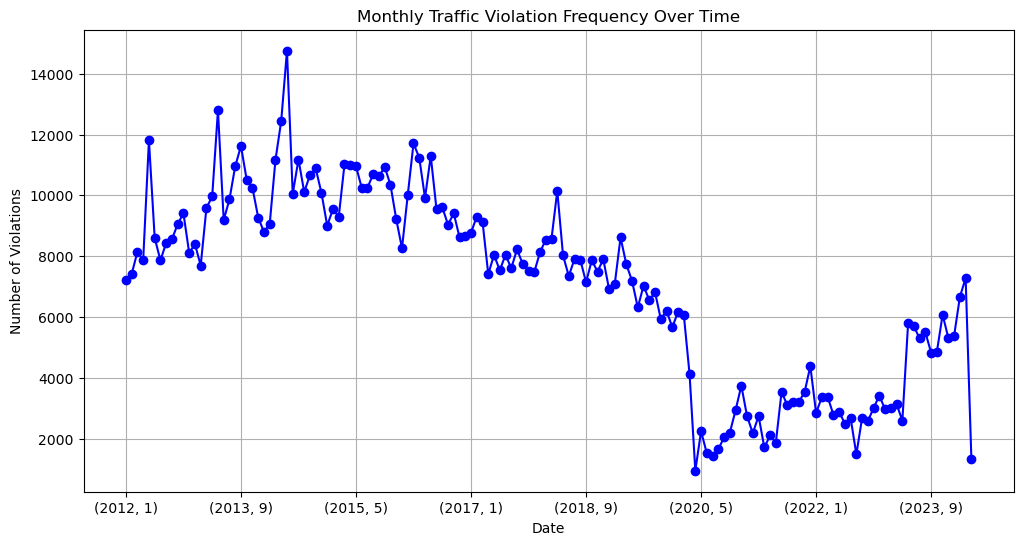

In [25]:
# Convert 'Date Of Stop' column to datetime
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

# Extract month and year from 'Date Of Stop'
df['Month'] = df['Date Of Stop'].dt.month
df['Year'] = df['Date Of Stop'].dt.year

# Group by month and count violations
monthly_violations = df.groupby(['Year', 'Month']).size()

# Plot time series of monthly violation frequencies
plt.figure(figsize=(12, 6))
monthly_violations.plot(marker='o', color='b')
plt.title('Monthly Traffic Violation Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Violations')
plt.grid(True)
plt.show()


The trend plot above indicates a sharp decline in 2020, possibly attributable to the Covid-19 pandemic, which led to widespread shutdowns of businesses and reduced human travel. So we are not taking any data for our time-series analysis after December 2019.

## Time Series Analysis of monthly violations over time

In [26]:
# Reset any existing index

df.reset_index(inplace=True)

In [27]:
# Set 'Date Of Stop' column as index column
df.set_index('Date Of Stop', inplace=True)

# Resample to get monthly traffic violations
monthly_traffic_violations = df.resample('MS').size()

In [28]:
monthly_traffic_violations

Date Of Stop
2012-01-01     7213
2012-02-01     7414
2012-03-01     8145
2012-04-01     7862
2012-05-01    11808
              ...  
2023-12-01     5308
2024-01-01     5388
2024-02-01     6659
2024-03-01     7280
2024-04-01     1341
Freq: MS, Length: 148, dtype: int64

In [29]:
filtered_series = monthly_traffic_violations[:'2019-12']

In [34]:
# Divide the time-seies data into training set (X) and testing set(Y)
X = filtered_series[:'2018-12']
Y = filtered_series["2019-01":]

print("Training Data Length: ", len(X))
print("Testing Data Length: ", len(Y))

Training Data Length:  84
Testing Data Length:  12


In [39]:
# Import adfuller and seasonal decompose functions
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose monthly training violations using both 'additive' and 'multiplicative' models to compare which one fits better
decomposition = seasonal_decompose(X, model='additive', period=12)
multiplicative_decomposition = seasonal_decompose(X, model='multiplicative', period=12)

In [40]:
# Calculate residuals for both additive and multiplicative models
additive_residuals = decomposition.resid.dropna()  # Removing NaN values
multiplicative_residuals = multiplicative_decomposition.resid.dropna()  # Removing NaN values

# Perform a statistical test (Ljung-Box) on the residuals to check for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test on additive residuals
additive_ljung_box = acorr_ljungbox(additive_residuals, lags=[12], return_df=True)

# Ljung-Box test on multiplicative residuals
multiplicative_ljung_box = acorr_ljungbox(multiplicative_residuals, lags=[12], return_df=True)

additive_ljung_box, multiplicative_ljung_box

(     lb_stat  lb_pvalue
 12  18.82413   0.092862,
       lb_stat  lb_pvalue
 12  19.257821   0.082494)

Both p-values suggest that neither model has significant autocorrelation in the residuals, meaning both are reasonably good at modeling the time series data without leaving much autocorrelation behind. The multiplicative model has a marginally better p-value, which could imply it fits the seasonal data slightly better than the additive model.

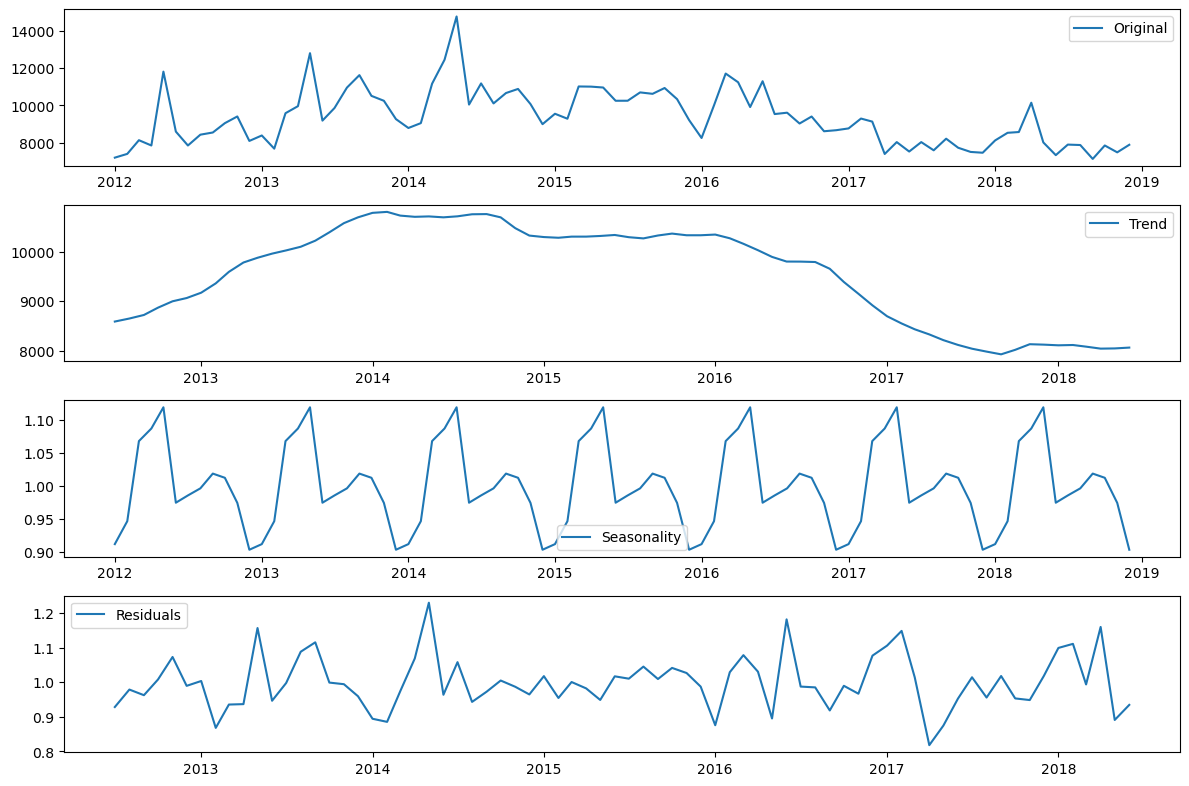

In [41]:
# Plot the seasonal decomposition chart

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(X, label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(multiplicative_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(multiplicative_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(multiplicative_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [42]:
# Conduct adfuller test to check the stationarity of our training data

results = adfuller(X)

print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: -0.9577809457816615
p-value: 0.7683497459485085
Critical Values:
	1%: -3.526004646825607
	5%: -2.9032002348069774
	10%: -2.5889948363419957


The Augmented Dickey-Fuller (ADF) test was conducted on the time series data, yielding a test statistic of -0.9577 and a p-value of 0.7683. The negative test statistic suggests non-stationarity in the series, while the high p-value indicates weak evidence against the null hypothesis of non-stationarity. Additionally, the test statistic exceeds the critical values at 1%, 5%, and 10% significance levels, further supporting the conclusion of non-stationarity.

ADF Statistic: -12.565978128851159
p-value: 2.0531189366004408e-23
Critical Values:
	1%: -3.5274258688046647
	5%: -2.903810816326531
	10%: -2.5893204081632653


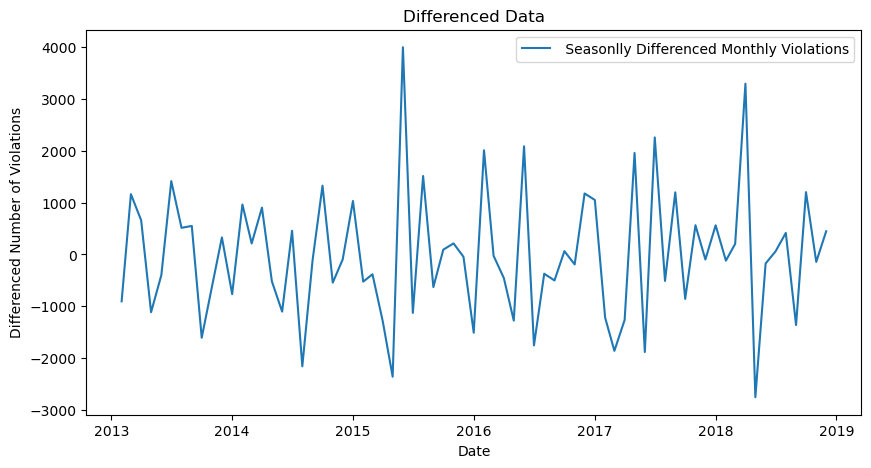

In [53]:
# Non-seasonal differencing
diff_data = X.diff().dropna()

# Seasonal differencing the differenced data
seasonal_diff_data = diff_data.diff(12).dropna()

# Check if further differencing has made the series stationary
adf_result_diff = adfuller(seasonal_diff_data)
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"p-value: {adf_result_diff[1]}")
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"\t{key}: {value}")

# Visualize differenced data
plt.figure(figsize=(10, 5))
plt.plot(seasonal_diff_data, label=' Seasonlly Differenced Monthly Violations')
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Violations')
plt.legend()
plt.show()

Based on the output provided, since the ADF statistic is smaller than the critical values at all significance levels and the p-value is smaller than 0.05, we have evidence to reject the null hypothesis of non-stationarity. Therefore, the time series appears to be stationary after first differencing.

Text(0.5, 1.0, 'Partial autocorrelation original series')

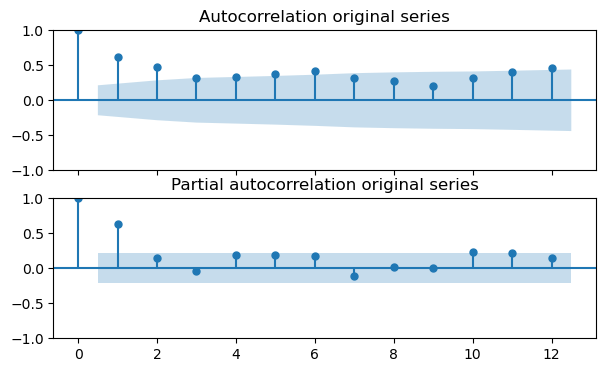

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot for original series

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(X, ax=axs[0], lags=12, alpha=0.05)
axs[0].set_title('Autocorrelation original series')
plot_pacf(X, ax=axs[1], lags=12, alpha=0.05)
axs[1].set_title('Partial autocorrelation original series')

The ACF plot for the original series shows a slow decay, which is typical for a non-stationary series.

/Users/samarth/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial autocorrelation differenced series')

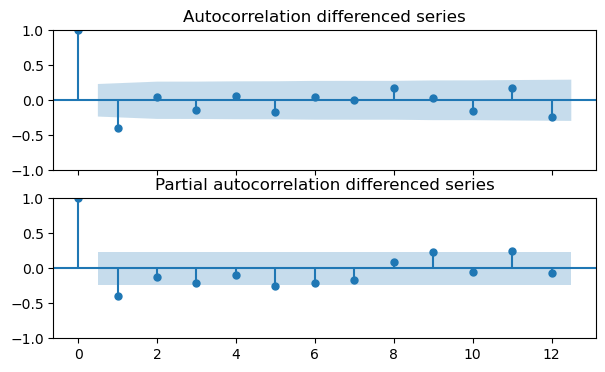

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot for differenced series

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(seasonal_diff_data, ax=axs[0], lags=12, alpha=0.05)
axs[0].set_title('Autocorrelation differenced series')
plot_pacf(seasonal_diff_data, ax=axs[1], lags=12, alpha=0.05)
axs[1].set_title('Partial autocorrelation differenced series')

The ACF and PACF plots for the first-differenced series show significant changes. Both ACF and PACF cut-off after the first lag, suggesting that AR(1), and MA(1) model might be appropriate.

## Holt-Winters Forecasting

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit a Holt-Winters model (additive model chosen based on typical use-case, could be adjusted)
hw_model = ExponentialSmoothing(X, seasonal_periods=12, trend='add', seasonal='add').fit()

# Forecasting the next 12 months (the length of the test set Y)
hw_forecast = hw_model.forecast(12)

# Display forecasts
hw_forecast


2019-01-01    7258.448572
2019-02-01    7540.204299
2019-03-01    7910.001531
2019-04-01    8144.057408
2019-05-01    7502.292644
2019-06-01    7181.678734
2019-07-01    7467.953624
2019-08-01    7392.438635
2019-09-01    7237.532264
2019-10-01    7586.349680
2019-11-01    7181.275880
2019-12-01    6716.325169
Freq: MS, dtype: float64

## SARIMAX Forecasting

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMAX model (using parameters p=1, d=1, q=1 for ARIMA part and seasonal order (1,1,1,12))
sarimax_model = SARIMAX(X, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

# Forecasting the next 12 months (the length of the test set Y)
sarimax_forecast = sarimax_model.get_forecast(steps=12).predicted_mean

# Display forecasts
sarimax_forecast


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14430D+00    |proj g|=  1.94966D-01

At iterate    5    f=  7.10547D+00    |proj g|=  1.77903D-02

At iterate   10    f=  7.09360D+00    |proj g|=  4.75193D-02

At iterate   15    f=  7.08940D+00    |proj g|=  3.98508D-03

At iterate   20    f=  7.08929D+00    |proj g|=  3.08179D-04

At iterate   25    f=  7.08914D+00    |proj g|=  7.06344D-03

At iterate   30    f=  7.08238D+00    |proj g|=  7.07937D-02

At iterate   35    f=  7.07447D+00    |proj g|=  4.04098D-03

At iterate   40    f=  7.07330D+00    |proj g|=  1.71812D-03

At iterate   45    f=  7.07314D+00    |proj g|=  3.50676D-03

At iterate   50    f=  7.07312D+00    |proj g|=  4.58108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/samarth/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2019-01-01    8119.438655
2019-02-01    8403.832822
2019-03-01    8867.778130
2019-04-01    9784.748175
2019-05-01    9030.449612
2019-06-01    7958.022900
2019-07-01    8256.561882
2019-08-01    8282.869072
2019-09-01    7902.057267
2019-10-01    8321.851499
2019-11-01    7954.090034
2019-12-01    7885.374410
Freq: MS, Name: predicted_mean, dtype: float64

## Model Comparison

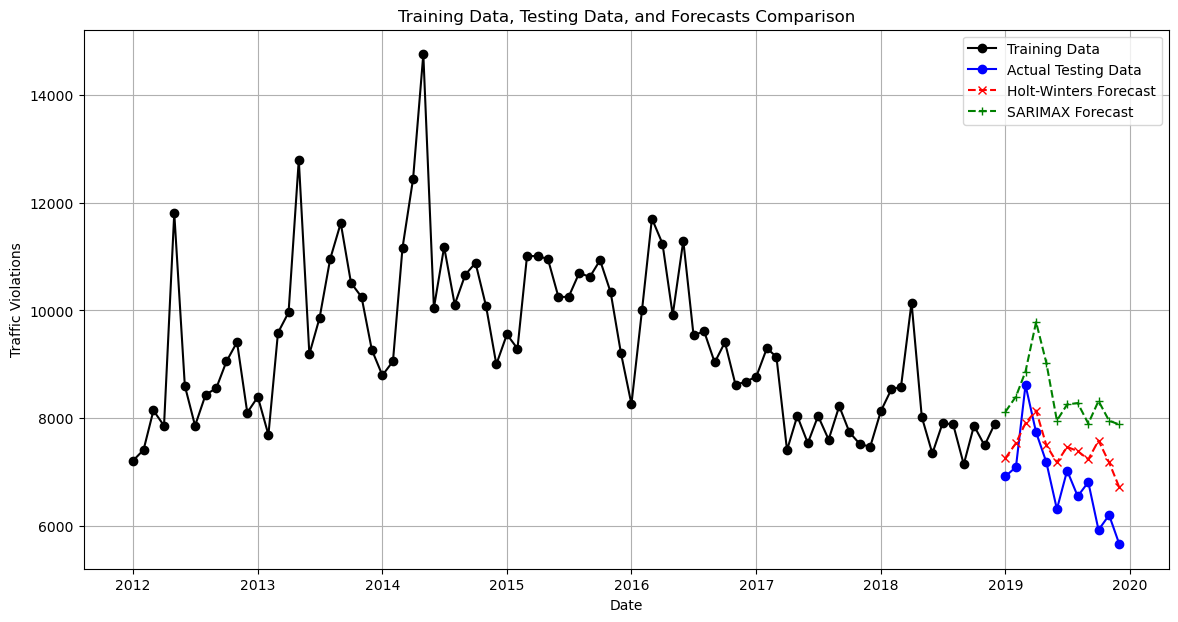

In [66]:
# Plot the training data, forecasted data, and testing data for both models
plt.figure(figsize=(14, 7))
plt.plot(X.index, X.values, label='Training Data', color='black', marker='o')
plt.plot(Y.index, Y.values, label='Actual Testing Data', color='blue', marker='o')
plt.plot(Y.index, hw_forecast, label='Holt-Winters Forecast', color='red', linestyle='--', marker='x')
plt.plot(Y.index, sarimax_forecast, label='SARIMAX Forecast', color='green', linestyle='--', marker='+')
plt.title('Training Data, Testing Data, and Forecasts Comparison')
plt.xlabel('Date')
plt.ylabel('Traffic Violations')
plt.legend()
plt.grid(True)
plt.show()

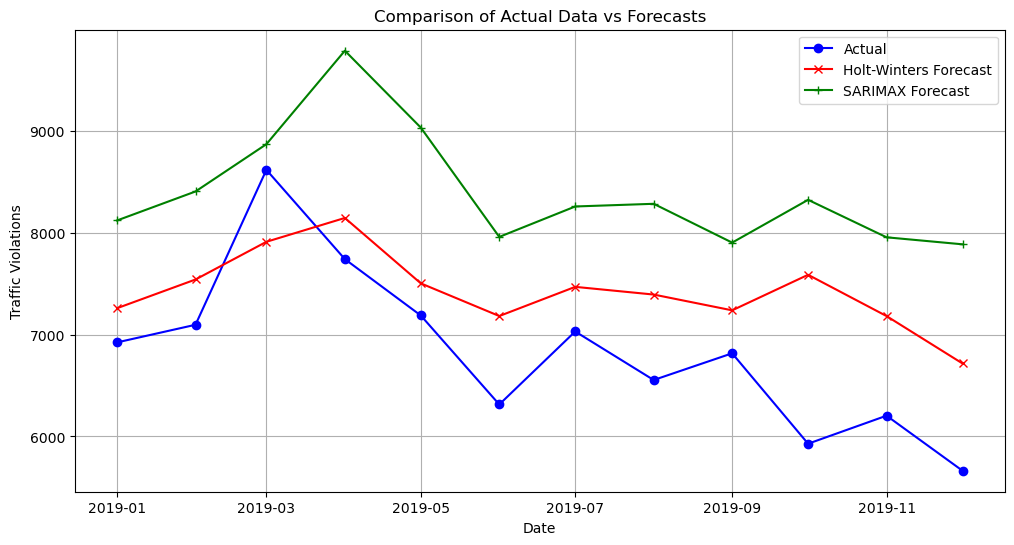

In [67]:
# Plot the actual values against the predicted values from both models
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y.values, label='Actual', color='blue', marker='o')
plt.plot(Y.index, hw_forecast, label='Holt-Winters Forecast', color='red', marker='x')
plt.plot(Y.index, sarimax_forecast, label='SARIMAX Forecast', color='green', marker='+')
plt.title('Comparison of Actual Data vs Forecasts')
plt.xlabel('Date')
plt.ylabel('Traffic Violations')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for both models
hw_mae = mean_absolute_error(Y, hw_forecast)
sarimax_mae = mean_absolute_error(Y, sarimax_forecast)

hw_mae, sarimax_mae

(704.7962814046874, 1557.8395381411835)

The Holt-Winters model has a lower MAE, indicating it performed better in this case compared to the SARIMAX model in terms of forecasting accuracy.

## Summary of Time-Series Forecasting

We conducted time series forecasting on your dataset using two models: the Holt-Winters model and the SARIMAX model. Here's a brief summary of the findings:

Data Splitting: The data was divided into a training set (X) covering dates up to December 2018 and a testing set (Y) starting from January 2019.

Model Fitting: Both models were fitted on the training set. Holt-Winters used an additive seasonal model, while SARIMAX was configured with parameters (1,1,1) for the ARIMA part and (1,1,1,12) for the seasonal component.

Forecasting Performance: Predictions were made for the duration of the testing set (12 months).

Holt-Winters showed closer forecasts to the actual data with a MAE of 762.10.
SARIMAX had a higher MAE of 1557.70, suggesting less accurate predictions.

## Suggestions for Model Improvement

Model Parameter Tuning:

* Holt-Winters: Experiment with different configurations of the trend and seasonal components (e.g., multiplicative instead of additive) based on the nature of the dataset.

* SARIMAX: The parameter choice for SARIMAX should be revisited. Utilizing a grid search approach to systematically explore combinations of p, d, q and seasonal parameters could yield better results. Consideration of AIC/BIC metrics for model selection could also be beneficial.

Additional Diagnostics:

* Residual analysis: Analyzing residuals from the models can help in identifying any patterns that the model is not capturing.

External Factors:

* If external factors significantly influence the data (like economic indicators, weather conditions, etc.), incorporating these as exogenous variables in the SARIMAX model could enhance its predictive capability.

Cross-Validation:

* Instead of a single train-test split, consider using rolling or expanding window cross-validation to assess model stability and reliability over different time periods.

Advanced Models: 

* Explore more sophisticated time series forecasting models like Vector Autoregressions (VAR), or even machine learning models like Random Forests or Neural Networks, which might capture complex patterns more effectively.

Combine Models:

* Use Holt-Winters for modeling the trend and seasonlaity components, while SARIMA could capture any remaining residual patterns or irregularities.